In [1]:
# project: p1
# submitter: Hhess3
# partner: none
# hours: 8

In [2]:
# import statements
import pandas as pd 
import os
import json
import copy
from matplotlib import pyplot as plt

In [3]:
#Q1
type(7/2)

float

In [4]:
#Q2
x = 4
maximum = 10
minimum = 5
error = (x < minimum) or (x > maximum)
error

True

In [5]:
#Q3
word = "KAFKAESQUE"
suffix = word[5:]
suffix_match = word[-len(suffix):].lower() == suffix.lower() # .endswith(...) method not allowed for this question! (practice slicing)
suffix_match

True

In [6]:
#Q4
def check_sum(x=0, y=0, sum=0):
    return x + y == sum

check_sum(0.1, 0.2, 0.3)

False

In [7]:
#Q5
check_sum(-1, 1)

True

In [8]:
#Q6
x = 4
if x % 2 != 0:
    status = "odd"
elif x % 2 == 0:
    status = "even"
else:
    status = "non-integer"
status

'even'

In [9]:
#Q7
nums = [3, 4, 1, 6]
for x in nums:
    print(x)
    
def smart_sum(numbers):
    total = 0 
    
    for num in numbers:
        if num < 0:
            continue 
        
        total += num 
        
        if total > 20:
            break
        
    return total 


smart_sum(nums)
    


3
4
1
6


14

In [10]:
#Q8
smart_sum([2, 1, -11, 3, 15, -1, 8, 2])

21

In [11]:
#Q9
header = ["A", "B", "C"]

coord1 = {"x": 8, "y": 5}
coord2 = {"x": 9, "y": 2, "z" : 4}
coord3 = {"x": 3, "y": 1, "z" : 7}

rows = [
    [1, 6, 7, 8, coord1],
    [3, 4, 9, coord2],
    [5, 2, coord3],
]

coord3["w"] = 6
rows

[[1, 6, 7, 8, {'x': 8, 'y': 5}],
 [3, 4, 9, {'x': 9, 'y': 2, 'z': 4}],
 [5, 2, {'x': 3, 'y': 1, 'z': 7, 'w': 6}]]

In [12]:
#Q10
rows[0][-1]["x"]

8

In [13]:
#Q11
v2 = copy.copy(rows)
v2[0] = 404    # first change
v2[1][1] = 404 # second change

rows

[[1, 6, 7, 8, {'x': 8, 'y': 5}],
 [3, 404, 9, {'x': 9, 'y': 2, 'z': 4}],
 [5, 2, {'x': 3, 'y': 1, 'z': 7, 'w': 6}]]

In [14]:
#Q12 
b_col_index = header.index("B")
b_col_sum = sum(row[b_col_index] for row in rows if b_col_index < len(row))
b_col_sum

412

In [15]:
#Q13
rows.sort(key=lambda row: row[header.index("B")], reverse=False)
rows

[[5, 2, {'x': 3, 'y': 1, 'z': 7, 'w': 6}],
 [1, 6, 7, 8, {'x': 8, 'y': 5}],
 [3, 404, 9, {'x': 9, 'y': 2, 'z': 4}]]

In [16]:
#Q14
f = open("/home/hhess3/CS320-FA23/p1/usd.json")
data = json.load(f)
f.close()

q14_conversion = 1000 * data["cad"]["rate"]
q14_conversion

1345.7986570780001

In [17]:
#Q15
def divide(dividend, divisor):
    try:
        result = dividend / divisor
    except ZeroDivisionError:
        result = float("nan")
    return result

divide(3,2)

1.5

In [18]:
#Q16
divide(0, 0)

nan

In [19]:
#Q17
years = {}
data = os.listdir("/home/hhess3/CS320-FA23/p1/home-computers")
for name in data:
    if name.endswith(".csv"):
            year = int(name[7:11])
            df = pd.read_csv(os.path.join("/home/hhess3/CS320-FA23/p1/home-computers", name), skiprows = 1)
            df = df.set_index("Geographic Area Name")
            years[year] = df
ans = sorted(years.keys())
ans

[2017, 2018, 2019, 2020, 2021]

In [20]:
#Q18
value_for_wisconsin = years[2021].at["Wisconsin", "Estimate!!Total"]

value_for_wisconsin

2401818

In [21]:
#Q19
total_households = 0
for col_name in years[2021].columns:
    if col_name.endswith("Estimate!!Total!!No Computer"):
        total_households += years[2021][col_name].sum()
int(total_households)


8902093

In [22]:
#Q20 
biggest_margin_of_error_fraction = (years[2021]["Margin of Error!!Total!!No Computer"] / years[2021]["Estimate!!Total!!No Computer"]).max()

biggest_margin_of_error_fraction

0.07836701790752577

In [23]:
#Q21
states_of_interest = ["Illinois", "Indiana", "Iowa", "Michigan", "Minnesota", "Wisconsin"]

data_2021 = years[2021]

percentage_without_computer = {}
for state in states_of_interest:
    no_computer_estimate = data_2021.at[state, "Estimate!!Total!!No Computer"]
    total_estimate = data_2021.at[state, "Estimate!!Total"]
    percentage = (no_computer_estimate / total_estimate) * 100
    percentage_without_computer[state] = round(percentage, 2)  # Rounding to two decimal places

percentage_without_computer


{'Illinois': 7.35,
 'Indiana': 8.3,
 'Iowa': 8.3,
 'Michigan': 7.58,
 'Minnesota': 6.18,
 'Wisconsin': 8.03}

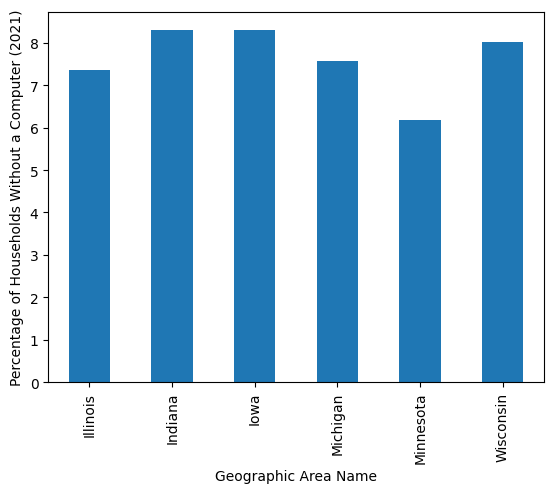

In [24]:
#Q22
percentage_series = pd.Series(percentage_without_computer)

ax = percentage_series.plot.bar()
ax.set_xlabel("Geographic Area Name")
ax.set_ylabel("Percentage of Households Without a Computer (2021)")

plt.show()

(0.0, 320.0)

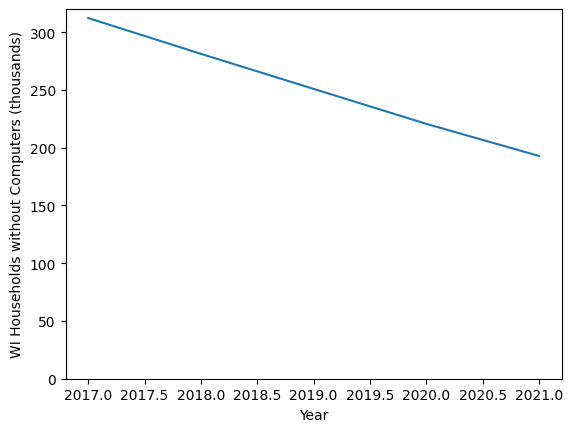

In [25]:
#Q23 
wisco_dict = {}
range_years = range(2017, 2022)

for year in range_years:
    data = years[year].at["Wisconsin", "Estimate!!Total!!No Computer"] / 1000
    wisco_dict[year] = data
wisco_dict

wdf = pd.DataFrame.from_dict(wisco_dict, orient = "index")
ax = wdf.plot.line()
ax.set_xlabel("Year")
ax.set_ylabel("WI Households without Computers (thousands)")
ax.get_legend().remove()
ax.set_ylim(0,320)

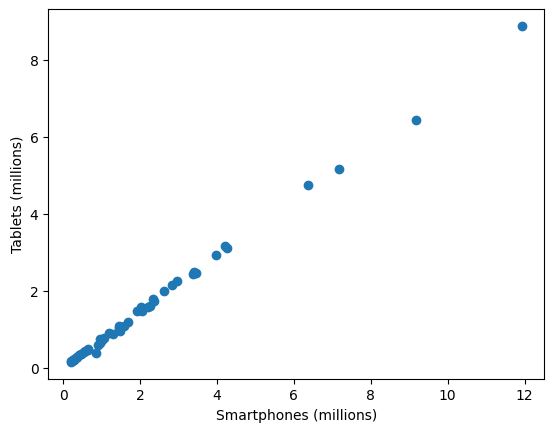

In [26]:
#Q24
phones = pd.Series(years[2021]["Estimate!!Total!!Has one or more types of computing devices!!Smartphone"] / 1e6, name = "a")
tablets = pd.Series(years[2021]["Estimate!!Total!!Has one or more types of computing devices!!Tablet or other portable wireless computer"] / 1e6, name = "b")
plt.scatter(phones, tablets)
plt.xlabel("Smartphones (millions)")
plt.ylabel("Tablets (millions)")
plt.show()

In [27]:
#Q25
import subprocess
repo_directory = "/home/hhess3/CS320-FA23/p1/flask/"

subprocess.run(["git", "checkout"], cwd=repo_directory)

output_bytes = subprocess.check_output(["git", "log"], cwd=repo_directory)

# Convert the byte sequence to a string using UTF-8 encoding
output_str = output_bytes.decode("utf-8")

# Split the string by newline to get a list of lines
output_lines = output_str.split('\n')

first_line = output_lines[0]

first_line

Your branch is up to date with 'origin/main'.


'commit 660994efc761efdfd49ca442b73f6712dc77b6cf'

In [28]:
#Q26

all_commits = []
for line in range(len(output_lines)):
    if output_lines[line].startswith('commit'):
        all_commits.append(output_lines[line][7:])
all_commits[-10:]

['a9d4ea81da28ee9c894bf9d45adc4cfa9d52fddc',
 '727c701686c18c4a27ca523eb0c5862d497be24e',
 '4edec48b74dbb9d571e927b69b24c30ec0624975',
 '625eba4bb403296a8bbc1e72cc9cf4a5126f6c02',
 '4aa76212d1be9b17a57249549c2a73fb10b6cda8',
 '3b36bef2e6165bb4dad73d17f23ee1879e99f497',
 '44b42e0fbd93d86e0f4e929bda8e5fb63e81035d',
 '4ec7d2a0d8eac4f915dc0d38a886cd57045bb0c4',
 'b15ad394279fc3b7f998fa56857f334a7c0156f6',
 '33850c0ebd23ae615e6823993d441f46d80b1ff0']

In [29]:
#Q27
subprocess.check_output(['git', 'checkout', all_commits[-100]], cwd = '/home/hhess3/CS320-FA23/p1/flask')
f = open("/home/hhess3/CS320-FA23/p1/flask/README")
data = f.read()
f.close
data

Note: switching to 'f878919753a909e45b2d5448aa175f4f9129ff24'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by switching back to a branch.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -c with the switch command. Example:

  git switch -c <new-branch-name>

Or undo this operation with:

  git switch -

Turn off this advice by setting config variable advice.detachedHead to false

HEAD is now at f8789197 With -> with in headline


"\n                          // Flask //\n\n         because sometimes a pocket knife is not enough\n\n\n    ~ What is Flask?\n\n      Flask is a microframework for Python based on Werkzeug\n      and Jinja2.  It's intended for small scale applications\n      and was development with best intentions in mind.\n\n    ~ Is it ready?\n\n      A preview release is out now, and I'm hoping for some\n      input about what you want from a microframework and\n      how it should look like.  Consider the API to slightly\n      improve over time.\n\n    ~ What do I need?\n\n      Jinja 2.4 and Werkzeug 0.6.1.  `easy_install` will\n      install them for you if you do `easy_install Flask==dev`.\n      I encourage you to use a virtualenv.  Check the docs for\n      complete installation and usage instructions.\n\n    ~ Where are the docs?\n\n      Go to http://flask.pocoo.org/ for a prebuild version of\n      the current documentation.  Otherwise build them yourself\n      from the sphinx sources i

In [30]:
#Q28
subprocess.call(['git', 'checkout', 'main'], cwd = '/home/hhess3/CS320-FA23/p1/flask')

output = str(subprocess.check_output(['git', 'log'], cwd = '/home/hhess3/CS320-FA23/p1/flask'), encoding = "utf-8").split("\n")
    
dict_operators = {}
for x in output:
    if "Merge pull request" in x and "/" in x:
        str_output = x.split("/")
        operator = str_output[0].split()[-1]
        dict_operators[operator] = dict_operators.get(operator, 0) + 1
    
ten_times = {k:v for (k, v) in dict_operators.items() if v > 10}
ten_times

Previous HEAD position was f8789197 With -> with in headline
Switched to branch 'main'


Your branch is up to date with 'origin/main'.


{'pallets': 204,
 'pgjones': 14,
 'greyli': 42,
 'ThiefMaster': 11,
 'davidism': 45,
 'untitaker': 20,
 'ThomasWaldmann': 13,
 'SimonSapin': 11}

In [31]:
#Q29
try:
    msg = subprocess.check_output(["pip3", "instal"], stderr=subprocess.STDOUT, universal_newlines=True)
except subprocess.CalledProcessError as e:
    msg = e.output

msg

'ERROR: unknown command "instal" - maybe you meant "install"\n'

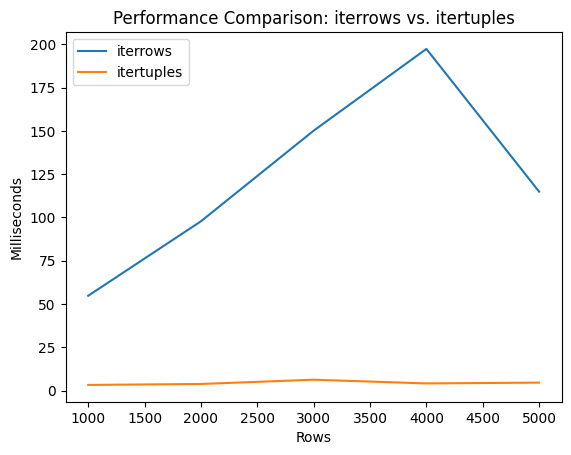

In [32]:
#Q30
import time
import numpy as np

def rand_df(rows):
    return pd.DataFrame(np.random.randint(10, size=(rows, 5)),
                        columns=["A", "B", "C", "D", "E"],
                        index=[f"r{i}" for i in range(1, rows+1)])

df_sizes = [1000, 2000, 3000, 4000, 5000]

timing_results = pd.DataFrame(columns=["iterrows", "itertuples"])

for size in df_sizes:
    df = rand_df(size)
    
    t0 = time.time()
    for row in df.iterrows():
        pass
    t1 = time.time()
    iterrows_time = (t1 - t0) * 1000 
    
    t0 = time.time()
    for row in df.itertuples():
        pass
    t1 = time.time()
    itertuples_time = (t1 - t0) * 1000 
    
    timing_results.at[size, "iterrows"] = iterrows_time
    timing_results.at[size, "itertuples"] = itertuples_time

timing_results.plot.line()
plt.xlabel("Rows")
plt.ylabel("Milliseconds")
plt.title("Performance Comparison: iterrows vs. itertuples")
plt.show()


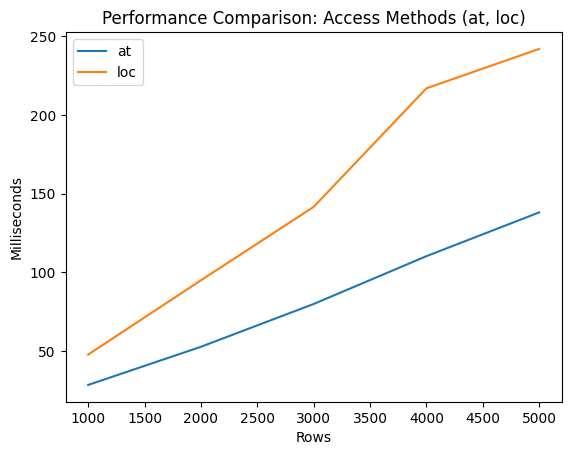

In [33]:
#Q31
timing_results = pd.DataFrame(columns=["at", "loc"])

for size in df_sizes:
    df = rand_df(size)

    t0 = time.time()
    total = 0
    for idx in df.index:
        for col in df.columns:
            total += df.at[idx, col]
    t1 = time.time()
    at_time = (t1 - t0) * 1000  
    
    t0 = time.time()
    total = 0
    for idx in df.index:
        for col in df.columns:
            total += df.loc[idx, col]
    t1 = time.time()
    loc_time = (t1 - t0) * 1000 
    
    timing_results.at[size, "at"] = at_time
    timing_results.at[size, "loc"] = loc_time

timing_results.plot.line()
plt.xlabel("Rows")
plt.ylabel("Milliseconds")
plt.title("Performance Comparison: Access Methods (at, loc)")
plt.show()

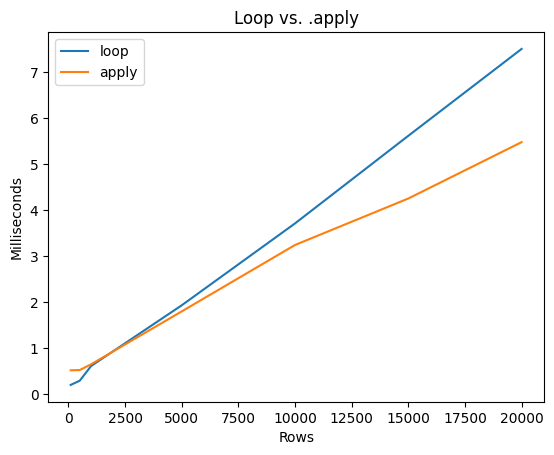

In [34]:
#Q32 
def laugh(x):
    return "qwerty" * x

df_sizes = [100, 500, 1000, 5000, 10000, 15000, 20000]

timing_results = pd.DataFrame(columns=["loop", "apply"])

for size in df_sizes:
    df = rand_df(size)
    
    t0 = time.time()
    result = []
    for val in df["A"]:
        result.append(laugh(val))
    t1 = time.time()
    loop_time = (t1 - t0) * 1000  
    
    t0 = time.time()
    result = df["A"].apply(laugh).tolist()
    t1 = time.time()
    apply_time = (t1 - t0) * 1000  
    
    timing_results.at[size, "loop"] = loop_time
    timing_results.at[size, "apply"] = apply_time

timing_results.plot.line()
plt.xlabel("Rows")
plt.ylabel("Milliseconds")
plt.title("Loop vs. .apply")
plt.show()